q = 
 [[-21.07850896  -7.20306962  -7.89918166  -7.51143563   3.12966123]]
Coefficient bitwidths = 
 [[24. 21. 25. 21. 16.]]
accum[ 0 ] | 47.0 22.0
alpha[ 0 ] | 24.0 22.0
beta [ 0 ] | 24.0 22.0
k_ts [ 0 ] | 25.0 24.0
----------------------------------------
accum[ 1 ] | 33.0 8.0
alpha[ 1 ] | 21.0 8.0
beta [ 1 ] | 21.0 8.0
k_ts [ 1 ] | 12.0 11.0
----------------------------------------
accum[ 2 ] | 33.0 8.0
alpha[ 2 ] | 25.0 8.0
beta [ 2 ] | 25.0 8.0
k_ts [ 2 ] | 12.0 11.0
----------------------------------------
accum[ 3 ] | 33.0 8.0
alpha[ 3 ] | 21.0 8.0
beta [ 3 ] | 21.0 8.0
k_ts [ 3 ] | 12.0 11.0
----------------------------------------
accum[ 4 ] | 25.0 0.0
alpha[ 4 ] | 16.0 0.0
beta [ 4 ] | 16.0 0.0
k_ts [ 4 ] | 2.0 1.0
----------------------------------------
np.amin(ds_in) -0.5
np.amax(ds_in) 0.5


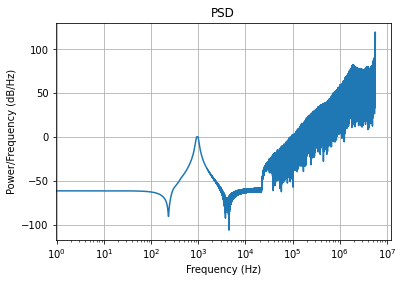

In [1]:
#
# Filter example - cheby2 bandpass
#
import numpy as np
from scipy import signal
import sys

if '../sdfpy' not in sys.path:
  sys.path.insert(0,'../sdfpy')

import sd_sim
import sdfpy as sdf

# ----------------------------------------------------------
# Filter Specifications
OSR = 256      # oversample ratio
fb  = 22050    # nyquist
fs  = OSR*2*fb # sampling frequency
ts  = 1/fs     # sampling period

# ----------------------------------------------------------
# Bandpass Filter - 300Hz to 3kHz
Rs = 60
Wn = 2*np.pi*np.array([300, 3000])
ftype = 'bandpass'
N = 4

[z,p,k]   = signal.cheby2(N/2,Rs,Wn,ftype, analog=True, output='zpk')
[A,B,C,D] = signal.zpk2ss(z,p,k)

filter = sdf.sd_filter(OSR,fb)
filter.run(A,B,C,D)
sd_sim.sim_filter(filter)